In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [11]:
!pip3 install matplotlib

w =  0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE =  18.666666666666668
w =  0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE =  16.846666666666668
w =  0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE =  15.120000000000003
w =  0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE =  13.486666666666665
w =  0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE =  11.946666666666667
w =  0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE =  10.5
w =  0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE =  9.146666666666663
w =  0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2

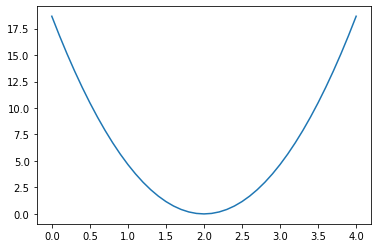

In [4]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

def forward(x):
    return x*w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred - y)

w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    print('w = ',w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        loss_val = loss(x_val, y_val)
        l_sum += loss_val
        print('\t', x_val, y_val, y_pred_val, loss_val)
    print("MSE = ", l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)
    
plt.plot(w_list, mse_list)
plt.show()

In [5]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0

def forward(x):
    return x*w

def cost(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        y_pred = forward(x)
        cost += (y_pred - y)**2
    return cost/len(xs)

def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        grad += 2*x*(x*w - y)
    return grad/len(xs)

print("Predict before training: ", 4, forward(4))

for epoch in range(100):
    cost_val = cost(x_data, y_data)
    grad_val = gradient(x_data, y_data)
    w -= 0.01 * grad_val
    print('Epoch: ', epoch, 'w = ', w, 'loss = ', cost_val)

print("Predict after training: ", 4, forward(4))

Predict before training:  4 4.0
Epoch:  0 w =  1.0933333333333333 loss =  4.666666666666667
Epoch:  1 w =  1.1779555555555554 loss =  3.8362074074074086
Epoch:  2 w =  1.2546797037037036 loss =  3.1535329869958857
Epoch:  3 w =  1.3242429313580246 loss =  2.592344272332262
Epoch:  4 w =  1.3873135910979424 loss =  2.1310222071581117
Epoch:  5 w =  1.4444976559288012 loss =  1.7517949663820642
Epoch:  6 w =  1.4963445413754464 loss =  1.440053319920117
Epoch:  7 w =  1.5433523841804047 loss =  1.1837878313441108
Epoch:  8 w =  1.5859728283235668 loss =  0.9731262101573632
Epoch:  9 w =  1.6246153643467005 loss =  0.7999529948031382
Epoch:  10 w =  1.659651263674342 loss =  0.6575969151946154
Epoch:  11 w =  1.6914171457314033 loss =  0.5405738908195378
Epoch:  12 w =  1.7202182121298057 loss =  0.44437576375991855
Epoch:  13 w =  1.7463311789976905 loss =  0.365296627844598
Epoch:  14 w =  1.7700069356245727 loss =  0.3002900634939416
Epoch:  15 w =  1.7914729549662791 loss =  0.2468517

In [3]:
import torch

In [4]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = torch.Tensor([1.0])
w.requires_grad = True


def forward(x):
    return x*w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2

print("Predict before training: ", 4, forward(4). item())

for epoch in range(100):
    for x, y in zip(x_data, y_data):
        l = loss(x, y)
        l.backward()
        print('\tgrad: ', x, y, w.grad.item())
        w.data = w.data - 0.01*w.grad.data
        
        w.grad.data.zero_()
    print("Progress: ", epoch, l.item())

print("Predict after training: ", 4, forward(4).item())

Predict before training:  4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.840000152587891
	grad:  3.0 6.0 -16.228801727294922
Progress:  0 7.315943717956543
	grad:  1.0 2.0 -1.478623867034912
	grad:  2.0 4.0 -5.796205520629883
	grad:  3.0 6.0 -11.998146057128906
Progress:  1 3.9987640380859375
	grad:  1.0 2.0 -1.0931644439697266
	grad:  2.0 4.0 -4.285204887390137
	grad:  3.0 6.0 -8.870372772216797
Progress:  2 2.1856532096862793
	grad:  1.0 2.0 -0.8081896305084229
	grad:  2.0 4.0 -3.1681032180786133
	grad:  3.0 6.0 -6.557973861694336
Progress:  3 1.1946394443511963
	grad:  1.0 2.0 -0.5975041389465332
	grad:  2.0 4.0 -2.3422164916992188
	grad:  3.0 6.0 -4.848389625549316
Progress:  4 0.6529689431190491
	grad:  1.0 2.0 -0.4417421817779541
	grad:  2.0 4.0 -1.7316293716430664
	grad:  3.0 6.0 -3.58447265625
Progress:  5 0.35690122842788696
	grad:  1.0 2.0 -0.3265852928161621
	grad:  2.0 4.0 -1.2802143096923828
	grad:  3.0 6.0 -2.650045394897461
Progress:  6 0.195076122879982
	grad:  1.0 2.0 -

Progress:  68 9.094947017729282e-13
	grad:  1.0 2.0 -7.152557373046875e-07
	grad:  2.0 4.0 -2.86102294921875e-06
	grad:  3.0 6.0 -5.7220458984375e-06
Progress:  69 9.094947017729282e-13
	grad:  1.0 2.0 -7.152557373046875e-07
	grad:  2.0 4.0 -2.86102294921875e-06
	grad:  3.0 6.0 -5.7220458984375e-06
Progress:  70 9.094947017729282e-13
	grad:  1.0 2.0 -7.152557373046875e-07
	grad:  2.0 4.0 -2.86102294921875e-06
	grad:  3.0 6.0 -5.7220458984375e-06
Progress:  71 9.094947017729282e-13
	grad:  1.0 2.0 -7.152557373046875e-07
	grad:  2.0 4.0 -2.86102294921875e-06
	grad:  3.0 6.0 -5.7220458984375e-06
Progress:  72 9.094947017729282e-13
	grad:  1.0 2.0 -7.152557373046875e-07
	grad:  2.0 4.0 -2.86102294921875e-06
	grad:  3.0 6.0 -5.7220458984375e-06
Progress:  73 9.094947017729282e-13
	grad:  1.0 2.0 -7.152557373046875e-07
	grad:  2.0 4.0 -2.86102294921875e-06
	grad:  3.0 6.0 -5.7220458984375e-06
Progress:  74 9.094947017729282e-13
	grad:  1.0 2.0 -7.152557373046875e-07
	grad:  2.0 4.0 -2.861022

In [19]:
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[2.0],[4.0],[6.0]])

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

In [20]:
criterion = nn.MSELoss(size_average=False)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

# Different optimizers optim.Adagrad/Adam/Adamax/ASGD/LBFGS/RMSprop/Rprop/SGD

/home/xinglongji/anaconda3/envs/tflite_opencv/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [22]:
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())

x_test = torch.Tensor([[4.0]])
y_test = model(x_test)

print('y_pred = ', y_test.data)

0 tensor(0.0012, grad_fn=<MseLossBackward>)
1 tensor(0.0012, grad_fn=<MseLossBackward>)
2 tensor(0.0011, grad_fn=<MseLossBackward>)
3 tensor(0.0011, grad_fn=<MseLossBackward>)
4 tensor(0.0011, grad_fn=<MseLossBackward>)
5 tensor(0.0011, grad_fn=<MseLossBackward>)
6 tensor(0.0011, grad_fn=<MseLossBackward>)
7 tensor(0.0011, grad_fn=<MseLossBackward>)
8 tensor(0.0010, grad_fn=<MseLossBackward>)
9 tensor(0.0010, grad_fn=<MseLossBackward>)
10 tensor(0.0010, grad_fn=<MseLossBackward>)
11 tensor(0.0010, grad_fn=<MseLossBackward>)
12 tensor(0.0010, grad_fn=<MseLossBackward>)
13 tensor(0.0010, grad_fn=<MseLossBackward>)
14 tensor(0.0010, grad_fn=<MseLossBackward>)
15 tensor(0.0009, grad_fn=<MseLossBackward>)
16 tensor(0.0009, grad_fn=<MseLossBackward>)
17 tensor(0.0009, grad_fn=<MseLossBackward>)
18 tensor(0.0009, grad_fn=<MseLossBackward>)
19 tensor(0.0009, grad_fn=<MseLossBackward>)
20 tensor(0.0009, grad_fn=<MseLossBackward>)
21 tensor(0.0009, grad_fn=<MseLossBackward>)
22 tensor(0.0009, gr

In [ ]:
import torchvision

train_set = torchvision.datasets.MNIST(root = '../data/mnist', train=True, download=True)
test_set = torchvision.datasets.MNIST(root = '../data/mnist', train=False, download=True)

# datasets.CIFAR10

In [23]:
import torch.nn.functional as F

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

In [25]:
criterion = torch.nn.BCELoss(size_average = False)

x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0], [0], [1]])

model = LogisticRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/home/xinglongji/anaconda3/envs/tflite_opencv/lib/python3.8/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 2.542973041534424
1 2.496074914932251
2 2.4513776302337646
3 2.408841609954834
4 2.368419647216797
5 2.330061197280884
6 2.2937097549438477
7 2.2593061923980713
8 2.2267868518829346
9 2.19608473777771
10 2.1671316623687744
11 2.139857292175293
12 2.114189624786377
13 2.0900564193725586
14 2.067385673522949
15 2.0461044311523438
16 2.02614164352417
17 2.0074267387390137
18 1.9898911714553833
19 1.9734675884246826
20 1.9580907821655273
21 1.943697452545166
22 1.930227518081665
23 1.917622685432434
24 1.905827283859253
25 1.8947880268096924
26 1.8844549655914307
27 1.8747801780700684
28 1.8657180070877075
29 1.8572262525558472
30 1.8492648601531982
31 1.8417960405349731
32 1.834783911705017
33 1.8281961679458618
34 1.8220012187957764
35 1.8161698579788208
36 1.8106756210327148
37 1.8054931163787842
38 1.8005989789962769
39 1.7959715127944946
40 1.7915908098220825
41 1.7874374389648438
42 1.783493995666504
43 1.7797448635101318
44 1.7761752605438232
45 1.772770881652832
46 1.769519090652

495 1.266741156578064
496 1.265990138053894
497 1.2652405500411987
498 1.2644917964935303
499 1.2637441158294678
500 1.2629971504211426
501 1.262251615524292
502 1.2615071535110474
503 1.2607632875442505
504 1.2600208520889282
505 1.2592791318893433
506 1.2585386037826538
507 1.2577991485595703
508 1.2570605278015137
509 1.256322979927063
510 1.2555865049362183
511 1.2548511028289795
512 1.254116415977478
513 1.2533830404281616
514 1.2526506185531616
515 1.2519190311431885
516 1.2511886358261108
517 1.2504591941833496
518 1.2497305870056152
519 1.2490030527114868
520 1.2482765913009644
521 1.2475509643554688
522 1.2468265295028687
523 1.246103048324585
524 1.2453802824020386
525 1.2446587085723877
526 1.2439380884170532
527 1.2432185411453247
528 1.2424997091293335
529 1.2417821884155273
530 1.2410653829574585
531 1.240349531173706
532 1.2396348714828491
533 1.2389209270477295
534 1.2382080554962158
535 1.2374961376190186
536 1.2367850542068481
537 1.2360754013061523
538 1.235366344451

995 0.9879435300827026
996 0.9875297546386719
997 0.9871166944503784
998 0.9867038726806641
999 0.9862915277481079
